In [1]:
import pandas as pd
import numpy as np
import optuna.integration.lightgbm as lgb
from sklearn.metrics import log_loss, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
import pickle
from sklearn.utils.class_weight import compute_sample_weight

In [23]:
with open('../resource/openstack_train.pkl', 'rb') as f_train, open('../resource/openstack_test.pkl', 'rb') as f_test:
    tr_dataset = pickle.load(f_train)
    te_dataset = pickle.load(f_test)

In [24]:
tr_x, va_x, tr_y, va_y = train_test_split(tr_dataset[4], tr_dataset[5], test_size=0.2, random_state=100)
sample_weights = compute_sample_weight(class_weight='balanced', y=tr_y)
dtrain = lgb.Dataset(np.array(tr_x), np.array(tr_y), weight=sample_weights)
dvalid = lgb.Dataset(np.array(va_x), np.array(va_y))


In [25]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'feature_pre_filter': False,
        'lambda_l1': 2.8082379562003607e-06,
        'lambda_l2': 4.0247909493263117e-07,
        'num_leaves': 3,
        'feature_fraction': 0.4,
        'bagging_fraction': 0.9874988943974509,
        'bagging_freq': 1,
        'min_child_samples': 20,
        'random_state': 100,
        'num_iterations': 10000,
        'early_stopping_rounds': 10,
}
# num_round = 1000

In [26]:
model = lgb.train(params, dtrain,
                  valid_names=['train', 'valid'], 
                  num_boost_round=10000,
                  valid_sets=[dtrain, dvalid],
                  callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=True),
                              lgb.log_evaluation(100)
                              ],
                 )

[I 2023-12-10 10:42:22,436] A new study created in memory with name: no-name-dbc13de7-b7c0-468a-a0f8-3583fe69cc97
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]c:\Users\masak\anaconda3\envs\test\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
feature_fraction, val_score: 0.527041:  14%|#4        | 1/7 [00:00<00:01,  4.59it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.533414	valid's binary_logloss: 0.553595
[200]	train's binary_logloss: 0.511348	valid's binary_logloss: 0.540219
[300]	train's binary_logloss: 0.495261	valid's binary_logloss: 0.53087
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.527041:  29%|##8       | 2/7 [00:00<00:00,  5.11it/s]

[100]	train's binary_logloss: 0.531516	valid's binary_logloss: 0.55198
[200]	train's binary_logloss: 0.510042	valid's binary_logloss: 0.53918
Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.531841	valid's binary_logloss: 0.551844
[200]	train's binary_logloss: 0.509802	valid's binary_logloss: 0.538832


feature_fraction, val_score: 0.523595:  43%|####2     | 3/7 [00:00<00:00,  5.00it/s]

[300]	train's binary_logloss: 0.493397	valid's binary_logloss: 0.529938
Early stopping, best iteration is:
[383]	train's binary_logloss: 0.482083	valid's binary_logloss: 0.523595
Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.532512	valid's binary_logloss: 0.554687


feature_fraction, val_score: 0.523595:  57%|#####7    | 4/7 [00:00<00:00,  4.62it/s]

[200]	train's binary_logloss: 0.510385	valid's binary_logloss: 0.541319
[300]	train's binary_logloss: 0.494222	valid's binary_logloss: 0.532254
Early stopping, best iteration is:
[347]	train's binary_logloss: 0.487935	valid's binary_logloss: 0.528426
Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.533535	valid's binary_logloss: 0.553692
[200]	train's binary_logloss: 0.512091	valid's binary_logloss: 0.540883


feature_fraction, val_score: 0.523595:  71%|#######1  | 5/7 [00:01<00:00,  4.78it/s]

[300]	train's binary_logloss: 0.496276	valid's binary_logloss: 0.531595
Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.532385	valid's binary_logloss: 0.552793
[200]	train's binary_logloss: 0.510562	valid's binary_logloss: 0.540908
[300]	train's binary_logloss: 0.494127	valid's binary_logloss: 0.531372


feature_fraction, val_score: 0.522995:  86%|########5 | 6/7 [00:01<00:00,  4.59it/s]

[400]	train's binary_logloss: 0.480492	valid's binary_logloss: 0.524364
Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.531434	valid's binary_logloss: 0.552718
[200]	train's binary_logloss: 0.5098	valid's binary_logloss: 0.53993
[300]	train's binary_logloss: 0.493289	valid's binary_logloss: 0.531325
Early stopping, best iteration is:
[293]	train's binary_logloss: 0.49418	valid's binary_logloss: 0.531274


num_leaves, val_score: 0.522995:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.345588:   5%|5         | 1/20 [00:00<00:08,  2.17it/s]

[100]	train's binary_logloss: 0.0822726	valid's binary_logloss: 0.348612
Early stopping, best iteration is:
[118]	train's binary_logloss: 0.0618138	valid's binary_logloss: 0.345588
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.345588:  10%|#         | 2/20 [00:00<00:07,  2.48it/s]

[100]	train's binary_logloss: 0.245826	valid's binary_logloss: 0.410193
[200]	train's binary_logloss: 0.129484	valid's binary_logloss: 0.367757
Early stopping, best iteration is:
[203]	train's binary_logloss: 0.127051	valid's binary_logloss: 0.366502
Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.381935	valid's binary_logloss: 0.475529
[200]	train's binary_logloss: 0.284809	valid's binary_logloss: 0.435057
[300]	train's binary_logloss: 0.217602	valid's binary_logloss: 0.405396
Early stopping, best iteration is:
[344]	train's binary_logloss: 0.194816	valid's binary_logloss: 0.395297


num_leaves, val_score: 0.345588:  15%|#5        | 3/20 [00:01<00:06,  2.60it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.345588:  20%|##        | 4/20 [00:01<00:06,  2.42it/s]

Early stopping, best iteration is:
[53]	train's binary_logloss: 0.0730952	valid's binary_logloss: 0.353002
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.344542:  25%|##5       | 5/20 [00:02<00:08,  1.84it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.344542:  30%|###       | 6/20 [00:02<00:07,  1.91it/s]

Early stopping, best iteration is:
[74]	train's binary_logloss: 0.0690035	valid's binary_logloss: 0.353683
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.341809:  35%|###5      | 7/20 [00:03<00:07,  1.86it/s]

Early stopping, best iteration is:
[55]	train's binary_logloss: 0.0605829	valid's binary_logloss: 0.341809
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.341809:  40%|####      | 8/20 [00:04<00:06,  1.82it/s]

Early stopping, best iteration is:
[57]	train's binary_logloss: 0.0564525	valid's binary_logloss: 0.341885
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  45%|####5     | 9/20 [00:04<00:05,  1.90it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  50%|#####     | 10/20 [00:04<00:04,  2.02it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  55%|#####5    | 11/20 [00:05<00:04,  2.09it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  60%|######    | 12/20 [00:05<00:03,  2.17it/s]

Early stopping, best iteration is:
[48]	train's binary_logloss: 0.0789627	valid's binary_logloss: 0.349149
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  65%|######5   | 13/20 [00:06<00:03,  2.24it/s]

[100]	train's binary_logloss: 0.0784544	valid's binary_logloss: 0.349527
Early stopping, best iteration is:
[114]	train's binary_logloss: 0.0627518	valid's binary_logloss: 0.346537
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  70%|#######   | 14/20 [00:06<00:02,  2.15it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  75%|#######5  | 15/20 [00:07<00:02,  2.14it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  80%|########  | 16/20 [00:07<00:01,  2.24it/s]

Early stopping, best iteration is:
[53]	train's binary_logloss: 0.070791	valid's binary_logloss: 0.34703
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  85%|########5 | 17/20 [00:08<00:01,  2.30it/s]

Early stopping, best iteration is:
[46]	train's binary_logloss: 0.0857136	valid's binary_logloss: 0.346076
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  90%|######### | 18/20 [00:08<00:00,  2.34it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421:  95%|#########5| 19/20 [00:08<00:00,  2.28it/s]

Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.340421: 100%|##########| 20/20 [00:09<00:00,  2.15it/s]


Early stopping, best iteration is:
[54]	train's binary_logloss: 0.0667755	valid's binary_logloss: 0.354995


bagging, val_score: 0.340421:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.340421:  10%|#         | 1/10 [00:00<00:04,  1.83it/s]

Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.340421:  20%|##        | 2/10 [00:01<00:04,  1.99it/s]

Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.340421:  30%|###       | 3/10 [00:01<00:03,  2.15it/s]

Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.337796:  40%|####      | 4/10 [00:01<00:03,  1.99it/s]

Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.337742:  50%|#####     | 5/10 [00:02<00:02,  1.86it/s]

Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.337742:  60%|######    | 6/10 [00:03<00:02,  1.93it/s]

Early stopping, best iteration is:
[59]	train's binary_logloss: 0.0823769	valid's binary_logloss: 0.340144
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.337742:  70%|#######   | 7/10 [00:03<00:01,  1.80it/s]

Early stopping, best iteration is:
[69]	train's binary_logloss: 0.0568679	valid's binary_logloss: 0.339356
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.337742:  80%|########  | 8/10 [00:04<00:01,  1.82it/s]

Early stopping, best iteration is:
[59]	train's binary_logloss: 0.0807451	valid's binary_logloss: 0.340801
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.337742:  90%|######### | 9/10 [00:04<00:00,  1.76it/s]

Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.335725:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.335725:  17%|#6        | 1/6 [00:00<00:02,  2.02it/s]

Early stopping, best iteration is:
[58]	train's binary_logloss: 0.0828006	valid's binary_logloss: 0.341822
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.335725:  33%|###3      | 2/6 [00:01<00:02,  1.87it/s]

Early stopping, best iteration is:
[57]	train's binary_logloss: 0.0849426	valid's binary_logloss: 0.350041
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.335725:  50%|#####     | 3/6 [00:01<00:01,  1.86it/s]

Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.335725:  67%|######6   | 4/6 [00:02<00:01,  1.95it/s]

Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.334969:  83%|########3 | 5/6 [00:02<00:00,  1.88it/s]

Early stopping, best iteration is:
[67]	train's binary_logloss: 0.0661864	valid's binary_logloss: 0.334969
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.334969: 100%|##########| 6/6 [00:03<00:00,  1.81it/s]


Early stopping, best iteration is:
[66]	train's binary_logloss: 0.065862	valid's binary_logloss: 0.335725


regularization_factors, val_score: 0.334969:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.189412	valid's binary_logloss: 0.379393
[200]	train's binary_logloss: 0.119308	valid's binary_logloss: 0.359867


regularization_factors, val_score: 0.334969:   5%|5         | 1/20 [00:00<00:12,  1.47it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.334969:  10%|#         | 2/20 [00:01<00:12,  1.48it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.334969:  15%|#5        | 3/20 [00:01<00:10,  1.61it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.11086	valid's binary_logloss: 0.345744


regularization_factors, val_score: 0.334969:  20%|##        | 4/20 [00:02<00:11,  1.42it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.334969:  25%|##5       | 5/20 [00:03<00:09,  1.56it/s]

[100]	train's binary_logloss: 0.205835	valid's binary_logloss: 0.384898
Early stopping, best iteration is:
[140]	train's binary_logloss: 0.171152	valid's binary_logloss: 0.37286
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.334969:  30%|###       | 6/20 [00:03<00:08,  1.56it/s]

Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0721109	valid's binary_logloss: 0.339615
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.334969:  35%|###5      | 7/20 [00:04<00:08,  1.59it/s]

Early stopping, best iteration is:
[74]	train's binary_logloss: 0.0513778	valid's binary_logloss: 0.340092
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.334969:  40%|####      | 8/20 [00:04<00:06,  1.77it/s]

Early stopping, best iteration is:
[59]	train's binary_logloss: 0.0854337	valid's binary_logloss: 0.338921
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.334969:  45%|####5     | 9/20 [00:05<00:06,  1.62it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.333110:  50%|#####     | 10/20 [00:06<00:07,  1.31it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.333110:  55%|#####5    | 11/20 [00:07<00:07,  1.25it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.333110:  60%|######    | 12/20 [00:08<00:06,  1.30it/s]

Early stopping, best iteration is:
[63]	train's binary_logloss: 0.0748804	valid's binary_logloss: 0.343394
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.331585:  65%|######5   | 13/20 [00:09<00:05,  1.25it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.331585:  70%|#######   | 14/20 [00:09<00:04,  1.29it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.331585:  75%|#######5  | 15/20 [00:10<00:03,  1.33it/s]

Early stopping, best iteration is:
[63]	train's binary_logloss: 0.0743206	valid's binary_logloss: 0.335531
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.331192:  80%|########  | 16/20 [00:11<00:03,  1.25it/s]

Early stopping, best iteration is:
[66]	train's binary_logloss: 0.0665543	valid's binary_logloss: 0.331192
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.329784:  85%|########5 | 17/20 [00:12<00:02,  1.25it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.329784:  90%|######### | 18/20 [00:13<00:01,  1.29it/s]

Early stopping, best iteration is:
[66]	train's binary_logloss: 0.0671521	valid's binary_logloss: 0.338782
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.329784:  95%|#########5| 19/20 [00:13<00:00,  1.36it/s]

Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.329784: 100%|##########| 20/20 [00:14<00:00,  1.37it/s]


Early stopping, best iteration is:
[69]	train's binary_logloss: 0.0610983	valid's binary_logloss: 0.339574


min_child_samples, val_score: 0.329784:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds


min_child_samples, val_score: 0.329784:  20%|##        | 1/5 [00:00<00:03,  1.24it/s]

Early stopping, best iteration is:
[53]	train's binary_logloss: 0.0605405	valid's binary_logloss: 0.332158
Training until validation scores don't improve for 10 rounds


min_child_samples, val_score: 0.329784:  40%|####      | 2/5 [00:01<00:02,  1.39it/s]

Training until validation scores don't improve for 10 rounds


min_child_samples, val_score: 0.329784:  60%|######    | 3/5 [00:02<00:01,  1.44it/s]

[100]	train's binary_logloss: 0.109434	valid's binary_logloss: 0.358255
Early stopping, best iteration is:
[117]	train's binary_logloss: 0.0839572	valid's binary_logloss: 0.35326
Training until validation scores don't improve for 10 rounds


min_child_samples, val_score: 0.329784:  80%|########  | 4/5 [00:02<00:00,  1.64it/s]

[100]	train's binary_logloss: 0.230132	valid's binary_logloss: 0.400895
Early stopping, best iteration is:
[154]	train's binary_logloss: 0.152757	valid's binary_logloss: 0.378757
Training until validation scores don't improve for 10 rounds


min_child_samples, val_score: 0.329784: 100%|##########| 5/5 [00:03<00:00,  1.42it/s]


In [7]:
# weight 1:2
model.params

{'objective': 'binary',
 'metric': 'binary_logloss',
 'verbosity': -1,
 'feature_pre_filter': False,
 'lambda_l1': 0.015863686607471256,
 'lambda_l2': 1.142903742029392e-08,
 'num_leaves': 164,
 'feature_fraction': 0.8999999999999999,
 'bagging_fraction': 0.8655455885210889,
 'bagging_freq': 6,
 'min_child_samples': 25,
 'random_state': 100,
 'num_iterations': 10000,
 'early_stopping_round': 10}

In [80]:
model.params

{'objective': 'binary',
 'random_state': 100,
 'metrics': ['binary_logloss', 'auc'],
 'feature_pre_filter': False,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 11,
 'feature_fraction': 0.42,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 100,
 'num_iterations': 10000}

In [10]:
te_dataset[4][0].index


Index(['la', 'ld', 'nf', 'nd', 'ns', 'ent', 'revd', 'nrev', 'rtime', 'hcmt',
       'self', 'ndev', 'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp', 'arexp',
       'rrexp', 'orexp', 'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr', 'osawr',
       'churn', 'fix'],
      dtype='object')

In [28]:
len(te_dataset[4][0].index)

29

In [27]:
model.feature_importance(importance_type='gain')

array([7504.82869428, 2134.64119467,  786.3866409 ,  636.54564071,
        194.03407764, 2781.28555201,    0.        , 1064.05668637,
       3263.995922  , 1854.59180322,   22.5855298 , 2188.95013495,
       3302.66649664, 1822.33861749,  762.46106883, 1892.64610773,
       1548.48925204, 1616.96908231, 1130.12669267, 2160.74953323,
       1828.96989152, 1958.41203755, 1833.37062253, 1735.99357094,
       2252.18839197, 2392.47851313, 3052.25039978, 3968.63362526,
        182.02801275])

In [33]:
import pandas as pd
df = pd.read_csv('../resource/feature_importance.csv', index_col=0, header=0)
df.loc['OpenStack'] = model.feature_importance(importance_type='gain')
df
# df = pd.DataFrame(data=[model.feature_importance(importance_type='gain')],index=['Qt'], columns=te_dataset[4][0].index)
df.to_csv('../resource/feature_importance.csv')

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

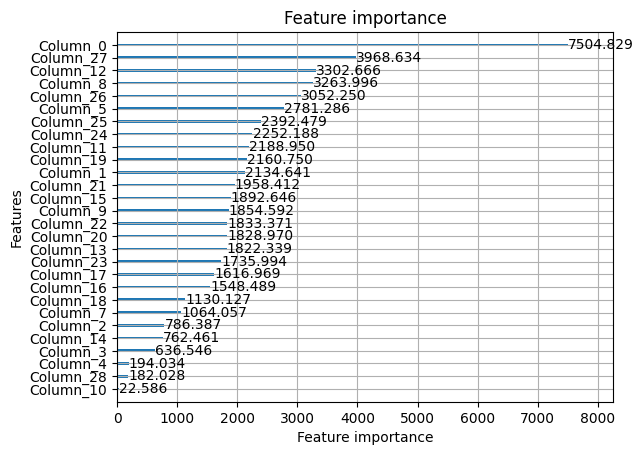

In [29]:
lgb.plot_importance(model, importance_type='gain')

In [82]:
data.columns

NameError: name 'data' is not defined

In [83]:

from sklearn.metrics import log_loss, roc_auc_score
pred = model.predict(te_dataset[4], num_iteration=model.best_iteration)

y_true = (pred > 0.3).astype(int)
print(y_true)
print(te_dataset[5])
print(roc_auc_score(te_dataset[5], pred))
print(log_loss(te_dataset[5], pred))
print(f1_score(te_dataset[5], y_true))

[0 0 0 ... 0 0 0]
[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [89]:
import lightgbm as lgb
va_period_list = [0,1,2,3]
auc_result = []
loss_result = []
for va_period in va_period_list:
    tr_index = [index for index, value in enumerate(tr_dataset[1]) if value != va_period]
    va_index = [index for index, value in enumerate(tr_dataset[1]) if value == va_period]
    tr_x = [tr_dataset[4][i] for i in tr_index]
    tr_y = [tr_dataset[5][i] for i in tr_index]
    va_x = [tr_dataset[4][i] for i in va_index]
    va_y = [tr_dataset[5][i] for i in va_index]
    dtrain = lgb.Dataset(np.array(tr_x), np.array(tr_y))
    dvalid = lgb.Dataset(np.array(va_x), np.array(va_y))
    params ={
        'objective': 'binary',
        'random_state': 100,
        'metrics': ['binary_logloss', 'auc'],
        'feature_pre_filter': False,
        'lambda_l1': 0.0,
        'lambda_l2': 0.0,
        'num_leaves': 11,
        'feature_fraction': 0.42,
        'bagging_fraction': 1.0,
        'bagging_freq': 0,
        'min_child_samples': 100,
        'num_iterations': 10000
    }
    early_stopping_rounds = 10
    model = lgb.train(params, dtrain, num_boost_round = num_round, 
                                   valid_names=['train','valid'], valid_sets=[dtrain, dvalid],
                                  callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds)])
    pred = model.predict(te_dataset[4], num_iteration=model.best_iteration)
    auc_result.append(roc_auc_score(te_dataset[5], pred))
    loss_result.append(log_loss(te_dataset[5], pred))


c:\Users\masak\anaconda3\envs\test\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\masak\anaconda3\envs\test\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 1337, number of negative: 7753
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5289
[LightGBM] [Info] Number of data points in the train set: 9090, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147085 -> initscore=-1.757652
[LightGBM] [Info] Start training from score -1.757652
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[47]	train's binary_logloss: 0.325076	train's auc: 0.829527	valid's binary_logloss: 0.177232	valid's auc: 0.799613
[LightGBM] [Info] Number of positive: 1161, number of negative: 7047
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5284
[LightGBM] [Info] Number of data 

c:\Users\masak\anaconda3\envs\test\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\masak\anaconda3\envs\test\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [91]:
print(np.mean(auc_result))
print(np.mean(loss_result))

0.7867342981528078
0.3582987067034247


In [92]:
auc_result

[0.7850637652979526,
 0.7927449102138853,
 0.7807799811277594,
 0.7883485359716345]